# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_tae = pd.read_csv('twitter-archive-enhanced.csv')
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
ip = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as f:
    f.write(ip.content)

In [4]:
df_ip = pd.read_csv('image-predictions.tsv', sep='\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tae.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079: 739485634323156992
Fail
1080: 739238157791694849
Fail
1081:

Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353: 703774238772166656
Fail
1354: 703769065844768768
Fail
1355:

Fail
1596: 686358356425093120
Fail
1597: 686286779679375361
Fail
1598: 686050296934563840
Fail
1599: 686035780142297088
Fail
1600: 686034024800862208
Fail
1601: 686007916130873345
Fail
1602: 686003207160610816
Fail
1603: 685973236358713344
Fail
1604: 685943807276412928
Fail
1605: 685906723014619143
Fail
1606: 685681090388975616
Fail
1607: 685667379192414208
Fail
1608: 685663452032069632
Fail
1609: 685641971164143616
Fail
1610: 685547936038666240
Fail
1611: 685532292383666176
Fail
1612: 685325112850124800
Fail
1613: 685321586178670592
Fail
1614: 685315239903100929
Fail
1615: 685307451701334016
Fail
1616: 685268753634967552
Fail
1617: 685198997565345792
Fail
1618: 685169283572338688
Fail
1619: 684969860808454144
Fail
1620: 684959798585110529
Fail
1621: 684940049151070208
Fail
1622: 684926975086034944
Fail
1623: 684914660081053696
Fail
1624: 684902183876321280
Fail
1625: 684880619965411328
Fail
1626: 684830982659280897
Fail
1627: 684800227459624960
Fail
1628: 684594889858887680
Fail
1629:

Fail
1870: 675153376133427200
Fail
1871: 675149409102012420
Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Fail
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881: 675006312288268288
Fail
1882: 675003128568291329
Fail
1883: 674999807681908736
Fail
1884: 674805413498527744
Fail
1885: 674800520222154752
Fail
1886: 674793399141146624
Fail
1887: 674790488185167872
Fail
1888: 674788554665512960
Fail
1889: 674781762103414784
Fail
1890: 674774481756377088
Fail
1891: 674767892831932416
Fail
1892: 674764817387900928
Fail
1893: 674754018082705410
Fail
1894: 674752233200820224
Fail
1895: 674743008475090944
Fail
1896: 674742531037511680
Fail
1897: 674739953134403584
Fail
1898: 674737130913071104
Fail
1899: 674690135443775488
Fail
1900: 674670581682434048
Fail
1901: 674664755118911488
Fail
1902: 674646392044941312
Fail
1903:

Fail
2144: 669970042633789440
Fail
2145: 669942763794931712
Fail
2146: 669926384437997569
Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Fail
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Fail
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail
2161: 669567591774625800
Fail
2162: 669564461267722241
Fail
2163: 669393256313184256
Fail
2164: 669375718304980992
Fail
2165: 669371483794317312
Fail
2166: 669367896104181761
Fail
2167: 669363888236994561
Fail
2168: 669359674819481600
Fail
2169: 669354382627049472
Fail
2170: 669353438988365824
Fail
2171: 669351434509529089
Fail
2172: 669328503091937280
Fail
2173: 669327207240699904
Fail
2174: 669324657376567296
Fail
2175: 669216679721873412
Fail
2176: 669214165781868544
Fail
2177:

In [7]:
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))
        
print(df_list[0])   

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
df_tweet = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
df_tweet.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df_tae.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None,None,None,None
1319,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534...,12,10,None,None,None,None,None
1041,743980027717509120,NaN,NaN,2016-06-18 01:33:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Geno. He's a Wrinkled Baklavian Velvee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743980027...,11,10,Geno,None,None,None,None
39,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,13,10,Lola,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
441,819711362133872643,NaN,NaN,2017-01-13 01:03:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819711362...,11,10,Howie,None,None,None,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
1345,704491224099647488,7.044857e+17,2.878549e+07,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carl. He's very powerfu...,7.529324e+17,4.196984e+09,2016-07-12 18:27:35 +0000,"https://vine.co/v/OEppMFbejFz,https://vine.co/...",12,10,Carl,None,None,None,None


In [10]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
type('timestamp')

str

In [12]:
type('retweeted_status_timestamp')

str

In [13]:
df_tae.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
df_tae.duplicated().sum()

0

In [15]:
df_tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_ip.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
249,670679630144274432,https://pbs.twimg.com/media/CU67jGSUkAAk_1Y.jpg,1,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True
1475,780476555013349377,https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...,1,pug,0.919255,True,French_bulldog,0.032350,True,bull_mastiff,0.028468,True
24,666353288456101888,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
233,670420569653809152,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1,bow_tie,0.268759,False,cardigan,0.153957,False,wig,0.072295,False
489,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,cocker_spaniel,0.299708,True,golden_retriever,0.263665,True,Irish_setter,0.080323,True


In [17]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_ip.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [19]:
df_ip.duplicated().sum()

0

In [20]:
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_tweet.sample(20)

,id_str,retweet_count,favorite_count
80,877201837425926144,5880,27755
714,783839966405230592,12643,33689
725,782598640137187329,2184,8694
1142,727286334147182592,920,3324
691,787111942498508800,7798,0
74,878281511006478336,1349,7913
449,818646164899774465,24069,0
1595,686050296934563840,836,2420
52,881906580714921986,3533,24773
1399,699434518667751424,577,2384


In [22]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [23]:
type('id_str')

str

In [24]:
df_tweet.isnull().sum()

id_str            0
retweet_count     0
favorite_count    0
dtype: int64

In [25]:
df_tweet.duplicated().sum()

0

In [26]:
df_tweet.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues
1. Dropping irrelavent columns from those datasets for our analysis.

2. For archive table, there are missing values in columns __in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.__

3. For tweet table, the column name __id_str__ should be change to __tweet_id__.

4. For archive table, columns __timestamp__ and __retweeted_status_timestamp__ have incorrect data type.

5. For tweet image table, the total number of data is 2075 instead of 2356.

6. For archive table, column __tweet_id__ has incorrect data type.

7. For tweeet image table, column __tweet_id__ has incorrect data type.

8. For tweet table, the total number of data is 2354 instead of 2356.

9. For tweet image table, the first letter of each name of columns __p1, p2__ and __p3__ are mixed with uppercases and lowercases. 

### Tidiness issues

1. Create a new column called rating, which equals to __rating_numerator / rating_denominator__.

2. Those three tables should be merged to one table. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
archive = df_tae.copy()
image = df_ip.copy()
tweet = df_tweet.copy()

### Issue #1: Dropping irrelavent columns from those datasets for our analysis.

#### Define: Dropping irrelavent columns from those datasets using 'drop()'

#### Code

In [28]:
# remove retweets by selecting only rows that have null values in retweet related columns
archive = archive[archive.retweeted_status_id.isnull()]
archive = archive[archive.retweeted_status_user_id.isnull()]
archive = archive[archive.retweeted_status_timestamp.isnull()]

In [29]:
archive = archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

#### Test

In [30]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #2: For archive table, there are missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.

#### Define: Dealing with missing values using 'dropna()'

#### Code

In [31]:
archive.dropna(inplace=True)

#### Test

In [32]:
archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #3: For tweet table, the column name id_str should be change to tweet_id.

#### Define: change colunm name using 'rename()'

#### Code

In [33]:
tweet.rename(index=str, columns={'id_str': 'tweet_id'}, inplace=True)

#### Test

In [34]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


### Issue #4: For archive table, columns timestamp has incorrect data type.

#### Define: fixing datetime datatyoe using 'to_datetime()'

#### Code

In [35]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

#### Test

In [36]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #5: For archive table, column tweet_id has incorrect data type. And for tweeet image table, column tweet_id has incorrect data type.

#### Define: convert int data type to string using 'astype(str)'

#### Code

In [37]:
archive['tweet_id'] = archive['tweet_id'].astype(str)

In [38]:
image['tweet_id'] = image['tweet_id'].astype(str)

#### Test

In [39]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


In [40]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6: For tweet image table, the first letter of each name of columns p1, p2 and p3 are mixed with uppercases and lowercases.

#### Define: converting all names into lowercases using 'str.lower()'

#### Code

In [41]:
image['p1'] = image['p1'].str.lower()

In [42]:
image['p2'] = image['p2'].str.lower()

In [43]:
image['p3'] = image['p3'].str.lower()

#### Test

In [44]:
image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,border_collie,0.100844,True,kelpie,0.048368,True
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,sussex_spaniel,0.064897,True,labrador_retriever,0.047704,True
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,sunglasses,0.900864,False,sunglass,0.040291,False,snorkel,0.009333,False
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
1535,790337589677002753,https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg,1,pembroke,0.658808,True,cardigan,0.153096,True,toy_terrier,0.102299,True
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,chihuahua,0.104152,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,labrador_retriever,0.009006,True,tennis_ball,0.007139,False
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,pomeranian,0.998275,True,chihuahua,0.000605,True,pekinese,0.000516,True
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False


### Issue #7: Merge three tables

#### Define: merge multiple tables into one table using the join()

#### Code

In [45]:
merge = archive.join(tweet.set_index('tweet_id'), on='tweet_id') 

In [46]:
merged = merge.join(image.set_index('tweet_id'), on='tweet_id')

In [47]:
merged_copy = merged.copy()

In [48]:
drop_index = merged_copy[pd.isnull(merged_copy['jpg_url'])].index
drop_index2 = merged_copy[pd.isnull(merged_copy['retweet_count'])].index
drop_index, drop_index2

(Int64Index([  30,   35,   42,   55,   64,   72,   83,   88,  110,  113,
             ...
             1895, 1905, 1914, 1916, 1940, 2038, 2149, 2189, 2212, 2298],
            dtype='int64', length=181),
 Int64Index([], dtype='int64'))

In [49]:
merged_copy.drop(index=drop_index, inplace=True)
merged_copy.drop(index=drop_index2, inplace=True)

#### Test

In [50]:
merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
 11  retweet_count       1994 non-null   int64              
 12  favorite_count      1994 non-null 

### Issue #8: Create a new column called rating

#### Define: standardize ratings using function 'rating_numerator / rating_denominator'

#### Code

In [51]:
merged_copy['rating'] = merged_copy['rating_numerator'] / merged_copy['rating_denominator']

In [52]:
merged_copy.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
26,886983233522544640,2017-07-17 16:17:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,13,10,Maya,None,None,None,...,chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False,1.3
507,812709060537683968,2016-12-24 17:18:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,12,10,Brandi,None,None,None,...,irish_setter,0.326873,True,golden_retriever,0.182610,True,leonberg,0.156912,True,1.2
891,759557299618865152,2016-07-31 01:12:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,10,10,Emma,None,None,None,...,golden_retriever,0.763333,True,chesapeake_bay_retriever,0.194251,True,labrador_retriever,0.012225,True,1.0
297,837110210464448512,2017-03-02 01:20:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,13,10,Clark,None,None,pupper,...,siberian_husky,0.767696,True,eskimo_dog,0.217079,True,malamute,0.011657,True,1.3
1096,736365877722001409,2016-05-28 01:18:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,11,10,Rory,None,None,pupper,...,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False,1.1
2122,670403879788544000,2015-11-28 00:48:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,10,10,Nigel,None,None,None,...,pug,0.802223,True,french_bulldog,0.172557,True,bull_mastiff,0.007163,True,1.0
1798,677228873407442944,2015-12-16 20:48:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,11,10,Chuq,None,None,None,...,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False,1.1
1622,684914660081053696,2016-01-07 01:49:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",12,10,None,None,None,None,...,shopping_cart,0.460950,False,chow,0.261288,True,labrador_retriever,0.074194,True,1.2
706,785533386513321988,2016-10-10 17:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,11,10,Dallas,None,None,None,...,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,rottweiler,0.145231,True,1.1
1725,680070545539371008,2015-12-24 17:00:27+00:00,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,9,10,Emmie,None,None,None,...,earthstar,0.127701,False,shih-tzu,0.121811,True,bubble,0.117820,False,0.9


#### Test

In [53]:
merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
 11  retweet_count       1994 non-null   int64              
 12  favorite_count      1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
merged_copy.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##### (1) Frequency of each source types

In [55]:
master = pd.read_csv('twitter_archive_master.csv')
master.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
619,766008592277377025,2016-08-17 20:27:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,11,10,Angel,None,None,None,...,welsh_springer_spaniel,0.728153,True,basset,0.103842,True,brittany_spaniel,0.062414,True,1.1
1727,670811965569282048,2015-11-29 03:50:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,10,10,Maggie,None,None,None,...,basset,0.994090,True,walker_hound,0.003973,True,beagle,0.001406,True,1.0
1523,675145476954566656,2015-12-11 02:49:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,9,10,None,None,None,None,...,labrador_retriever,0.458746,True,great_dane,0.235504,True,staffordshire_bullterrier,0.116864,True,0.9
1150,695095422348574720,2016-02-04 04:03:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,12,10,just,None,None,pupper,...,papillon,0.227784,True,chihuahua,0.218128,True,border_collie,0.093457,True,1.2
835,734787690684657664,2016-05-23 16:46:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,13,10,None,None,None,None,...,golden_retriever,0.883991,True,chow,0.023542,True,labrador_retriever,0.016056,True,1.3
896,720775346191278080,2016-04-15 00:46:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Berkeley. He's in a predicament. 10/10...,10,10,Berkeley,None,None,None,...,newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True,1.0
1198,691090071332753408,2016-01-24 02:48:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,12,10,None,None,None,None,...,barrow,0.241637,False,tub,0.238450,False,bathtub,0.167285,False,1.2
1574,674045139690631169,2015-12-08 01:57:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,3,10,None,None,None,None,...,robin,0.369661,False,rhinoceros_beetle,0.110607,False,european_fire_salamander,0.043178,False,0.3
1543,674752233200820224,2015-12-10 00:47:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,12,10,None,None,None,None,...,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True,1.2
1588,673709992831262724,2015-12-07 03:45:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,12,10,None,None,None,None,...,chihuahua,0.330171,True,siamese_cat,0.181580,False,kelpie,0.178227,True,1.2


In [56]:
source = master['source'].value_counts()
source

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

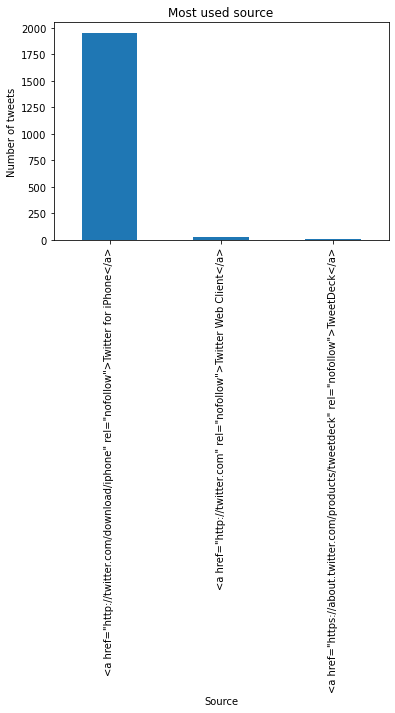

In [57]:
fig = source.plot.bar()

plt.title('Most used source')
plt.xlabel('Source')
plt.ylabel('Number of tweets');

##### (2) Relationship between Retweet and Favorite

<AxesSubplot:title={'center':'Relationship between Retweet and Favorite'}, xlabel='favorite_count', ylabel='retweet_count'>

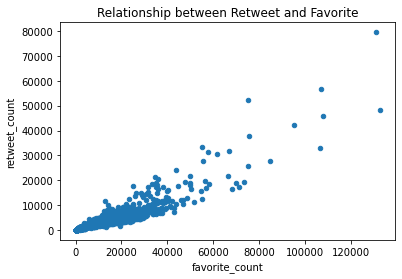

In [58]:
master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Relationship between Retweet and Favorite')

##### (3) Correlations

In [59]:
master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rating
tweet_id,1.000000,0.023630,-0.022426,0.405404,0.655276,0.212854,0.106469,0.120656,-0.002557,0.123795,-0.049237,0.097677,0.028658
rating_numerator,0.023630,1.000000,0.198240,0.013879,0.009995,-0.000684,-0.009049,-0.029150,-0.020724,-0.034601,-0.004173,-0.029355,0.979836
rating_denominator,-0.022426,0.198240,1.000000,-0.021193,-0.028682,-0.004094,-0.004240,0.000640,-0.034964,-0.000709,0.007071,0.004695,-0.001136
retweet_count,0.405404,0.013879,-0.021193,1.000000,0.912947,0.107198,0.054591,0.008552,-0.018472,0.016161,-0.044230,0.010015,0.018366
favorite_count,0.655276,0.009995,-0.028682,0.912947,1.000000,0.137053,0.079727,0.054368,-0.021680,0.060189,-0.053752,0.041207,0.015882
img_num,0.212854,-0.000684,-0.004094,0.107198,0.137053,1.000000,0.204406,0.032674,-0.156773,0.052354,-0.141409,0.062725,0.000020
p1_conf,0.106469,-0.009049,-0.004240,0.054591,0.079727,0.204406,1.000000,0.126961,-0.509531,0.142268,-0.707994,0.119391,-0.008526
p1_dog,0.120656,-0.029150,0.000640,0.008552,0.054368,0.032674,0.126961,1.000000,0.109214,0.635698,0.045770,0.558604,-0.029167
p2_conf,-0.002557,-0.020724,-0.034964,-0.018472,-0.021680,-0.156773,-0.509531,0.109214,1.000000,0.096064,0.480743,0.063713,-0.014023
p2_dog,0.123795,-0.034601,-0.000709,0.016161,0.060189,0.052354,0.142268,0.635698,0.096064,1.000000,0.033552,0.554644,-0.034438


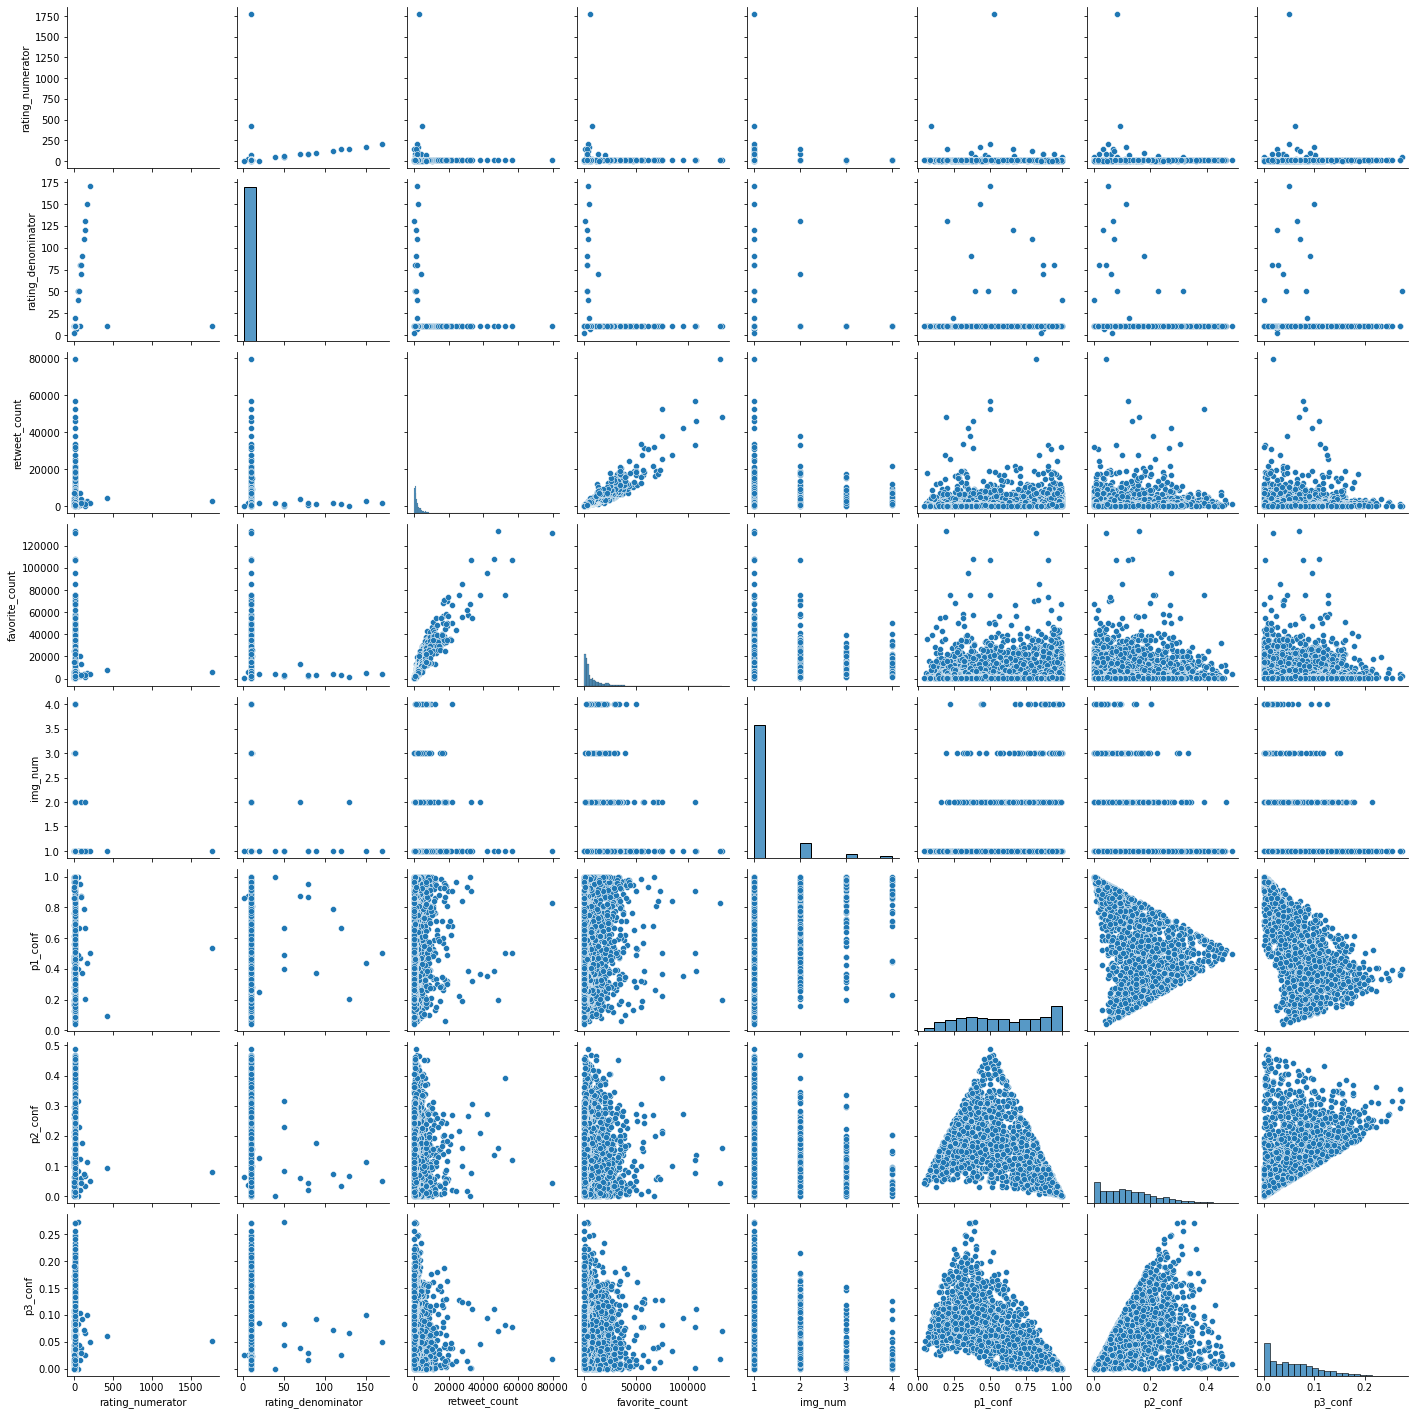

In [60]:
sns.pairplot(master, vars=['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf']);

### Insights:
1. We can see from the first analysis __'Frequency of each source types'__ that iphone users post much more tweets than web clients and tweetdeck users. 

2. For second analysis __'Relationship between Retweet and Favorite'__, the number of favorite and the number of retweet have strong positive relationship.

3. The correlation coefficient beteen __retweet_count__ and __favorite_count__ is 0.912947, which is close to 1. Therefore, there is a very strong positive correlation between those two variables. The correlation coefficient bewtween __p1_conf__ and __p2_conf__ is -0.509531, which shows a negative correlation between those two variables. The correlation coefficient bewtween __p1_conf__ and __p3_conf__ is -0.707994, which shows that there is negative correlation between those two variables.

### Visualization

In [61]:
dogname = master['name'].value_counts()[1:11]

In [62]:
dogname

a          55
Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Tucker      9
Winston     8
Sadie       8
the         7
Name: name, dtype: int64

Since name 'a' is not a valid name, we should delete it.

In [63]:
dogname = dogname[1:10]
dogname

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Tucker      9
Winston     8
Sadie       8
the         7
Name: name, dtype: int64

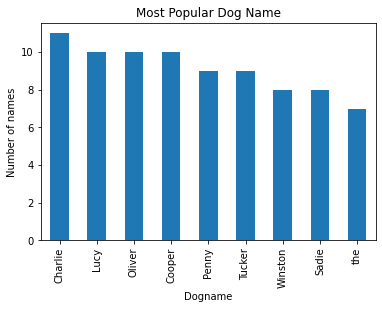

In [64]:
fig1 = dogname.plot.bar()

plt.title('Most Popular Dog Name')
plt.xlabel('Dogname')
plt.ylabel('Number of names');

We can see that 'Charlie' is the most popular name for dogs among tweet users. 